# Practice for image data analysis

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import imageio

In [7]:
img = plt.imread('./baby_yoda.jpeg')

[[[192.        ]
  [192.        ]
  [192.        ]
  ...
  [123.33333333]
  [120.33333333]
  [113.33333333]]

 [[192.        ]
  [192.        ]
  [192.        ]
  ...
  [123.33333333]
  [121.33333333]
  [115.33333333]]

 [[192.        ]
  [192.        ]
  [193.        ]
  ...
  [124.33333333]
  [122.33333333]
  [117.33333333]]

 ...

 [[138.66666667]
  [138.66666667]
  [137.66666667]
  ...
  [ 97.        ]
  [ 94.        ]
  [ 91.        ]]

 [[142.66666667]
  [142.66666667]
  [140.66666667]
  ...
  [ 99.        ]
  [ 99.        ]
  [ 98.        ]]

 [[143.66666667]
  [143.66666667]
  [142.66666667]
  ...
  [103.        ]
  [106.        ]
  [107.        ]]]
[[[192.         192.         192.        ]
  [192.         192.         192.        ]
  [192.         192.         192.        ]
  ...
  [123.33333333 123.33333333 123.33333333]
  [120.33333333 120.33333333 120.33333333]
  [113.33333333 113.33333333 113.33333333]]

 [[192.         192.         192.        ]
  [192.         192.     

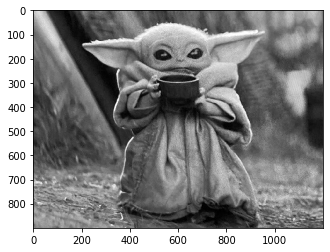

In [26]:
#create a copy of my image
copyImg = img.copy()

#get the average of each pixel
#we need axis=2 so that we take averages accross the 3rd axis (the color axis) rather than accross the rows or columns
average_pixel_values = np.mean(copyImg, axis=2, keepdims=True)
print(average_pixel_values)

#create the grey image by "stacking" three copies of these grey values together
greyImage = np.concatenate([average_pixel_values]*3, axis=2)
print(greyImage)

#make sure to cast the final image back to integers
greyImage = greyImage.astype(int)


#show the final image
plt.imshow(greyImage)

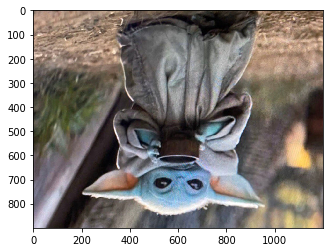

In [29]:
reversedImage = img[::-1]
plt.imshow(reversedImage)

In [36]:
arr = [2,3,4]
arr[::-1]

[4, 3, 2]

In [47]:
blur_img = img.copy()[:,:,0]



In [42]:
num_rows, num_cols, num = blur_img.shape

In [67]:
boxSize = 32
halfBoxSize = boxSize//2
startRow = halfBoxSize
startCol = halfBoxSize

In [68]:
for row in range(startRow, num_rows-halfBoxSize):
    for col in range(startCol, num_cols-halfBoxSize):
        temp = greyImage[row-halfBoxSize:row+halfBoxSize+1, col-halfBoxSize:col+halfBoxSize+1][:,:,0]
        blur_img[row,col] = np.mean(temp)

In [70]:
blur_img = blur_img.reshape([num_rows, num_cols, 1])

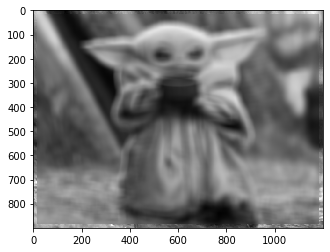

In [74]:
blurredImage = np.concatenate([blur_img]*3, axis=2)
plt.imshow(blurredImage)



In [76]:
X, Y = np.ogrid[:num_rows, :num_cols]


In [80]:
center_row, center_col = num_rows//2, num_cols//2
dist_from_center = (X - center_row)**2 + (Y - center_col)**2
#print(dist_from_center)
radius = (num_rows / 2)**2
#print("Radius = ", radius)
circular_mask = (dist_from_center > radius)

In [81]:
circular_mask

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

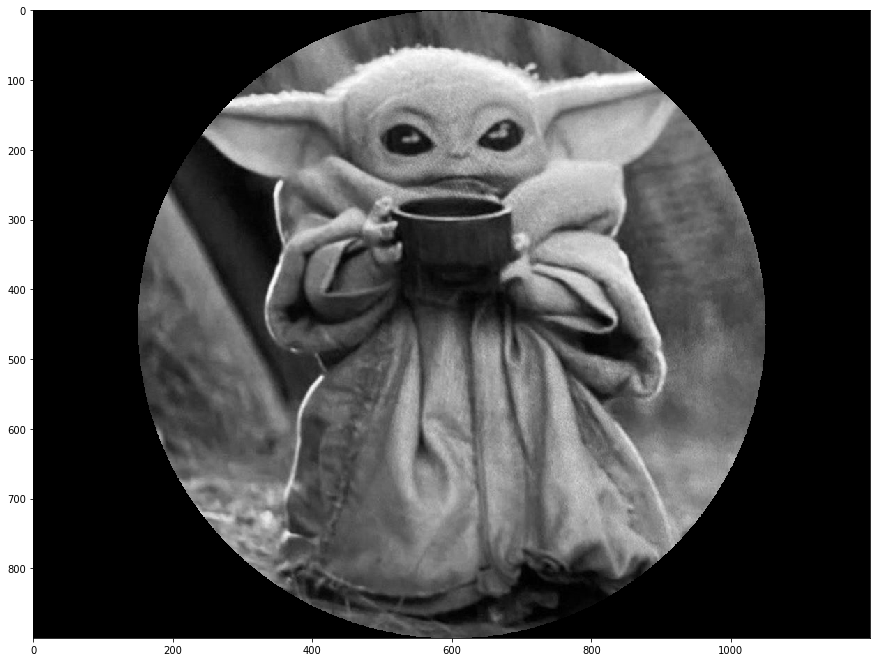

In [84]:
photo_data = greyImage.copy()
photo_data[circular_mask] = 0
plt.figure(figsize=(15,15))
plt.imshow(photo_data)

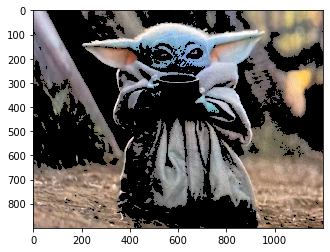

In [93]:
withoutred = img.copy()
withoutred[withoutred[:,:,0] < 100] = 0
plt.imshow(withoutred)